In [4]:
import numpy as np    
import uproot
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yw18581/Downloads/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'

In [5]:
fu = uproot.open(infile)
histogram = fu['histMedianMetric'].values()

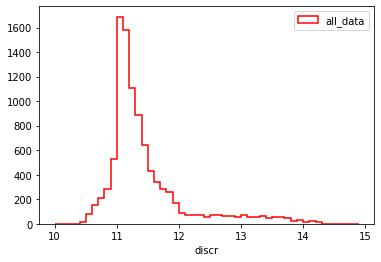

In [9]:
mybins = np.arange(10,15,.1)
plt.hist(histogram.ravel(), bins = mybins,edgecolor='red', linewidth=1.5,histtype=u'step', label='all_data')
plt.legend(loc='upper right')
plt.xlabel('discr')
plt.show()

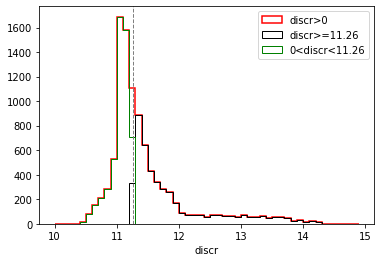

In [24]:
mybins = np.arange(10,15,.1)
plt.hist(histogram[histogram>0], bins = mybins,edgecolor='red', linewidth=1.5,histtype=u'step', label='discr>0')
plt.hist(histogram[histogram>=11.265], bins=mybins,  edgecolor='k', histtype=u'step',label='discr>=11.26')
plt.axvline(x=11.265, linestyle='--', c='gray', linewidth=1)
plt.hist(histogram[np.logical_and(histogram>0,histogram<11.26)],bins=mybins,  edgecolor='green', histtype=u'step', 
        label='0<discr<11.26')
plt.legend(loc='upper right')
plt.xlabel('discr')
plt.show()

In [15]:
filtered_hist = np.copy(histogram)

In [16]:
filtered_hist[filtered_hist<11.265]=0

##### plot distribution for histogram and filtered_hist, both with values >0 

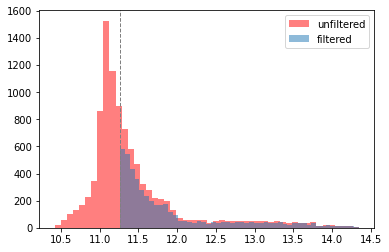

In [25]:
plt.hist(histogram[histogram>0], bins=50, color='red',alpha=.5, label='unfiltered')
plt.hist(filtered_hist[filtered_hist>0], bins=50, alpha=.5, label='filtered')
plt.axvline(x=11.265, linestyle='--', c='gray', linewidth=1)
plt.legend(loc='upper right')
plt.show()

#### define cube, to get coordinates of neighbours for each voxel

In [26]:
def cube(x, y, z):
    if x in [0,65] or y in [0, 65] or z in [0,32]:
        return None
    return np.mgrid[x-1:x+2:1, y-1:y+2:1, z-1:z+2:1]

#### get cube for each interesting voxel and store count of neighbour voxels with set value

neighbour Voxels over 11.265, given the centre > 11.265

In [27]:
stats_air_air = dict()
xx, yy, zz = np.where(histogram>=11.26)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    cx, cy, cz = cubes_coord
    filtered_cube = histogram[cx, cy, cz]
    over_threshold_count = len(filtered_cube[filtered_cube >= 11.26])-1
    stats_air_air[(x, y, z)] = over_threshold_count

In [28]:
min(stats_air_air.values()), max(stats_air_air.values())

(0, 26)

neighbour Voxels <11.265, given the centre 0<d<11.265

In [29]:
thresh = 11.26
stats_concrete_concrete = dict()
xx, yy, zz = np.where(np.logical_and(histogram<thresh, histogram>0))
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    cx, cy, cz = cubes_coord
    filtered_cube = histogram[cx, cy, cz]
    over_threshold_count_out = len(filtered_cube[filtered_cube < thresh])-1
    stats_concrete_concrete[(x, y, z)] = over_threshold_count_out

neighbour Voxels > 11.265, given the centre 0<d<11.265

In [30]:
thresh = 11.26
stats_air_centre_concrete = dict()
xx, yy, zz = np.where(np.logical_and(histogram<thresh, histogram>0))
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    cx, cy, cz = cubes_coord
    filtered_cube = histogram[cx, cy, cz]
    over_threshold_count = len(filtered_cube[filtered_cube > thresh])
    stats_air_centre_concrete[(x, y, z)] = over_threshold_count_out

neighbour Voxels < 11.265, given the centre >11.265

In [31]:
stats_concrete_centre_air = dict()
xx, yy, zz = np.where(filtered_hist>=11.26)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    cx, cy, cz = cubes_coord
    filtered_cube = filtered_hist[cx, cy, cz]
    over_threshold_count = len(filtered_cube[np.logical_and(filtered_cube < 11.26, filtered_cube>0)])
    stats_concrete_centre_air[(x, y, z)] = over_threshold_count

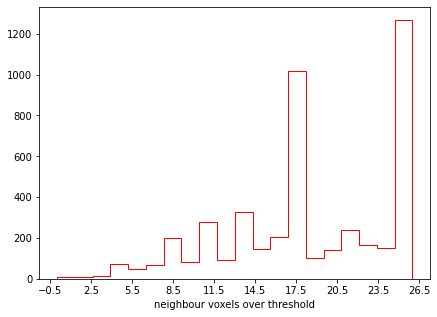

In [32]:
plt.figure(figsize=(7,5))
#bb =np.arange(-.5, 27.5, 1)
plt.hist(stats_air_air.values(), bins = 20, edgecolor='red', histtype=u'step', density=False)
plt.xlabel('neighbour voxels over threshold')
plt.xticks(np.arange(-0.5,27.5,3))
plt.show()

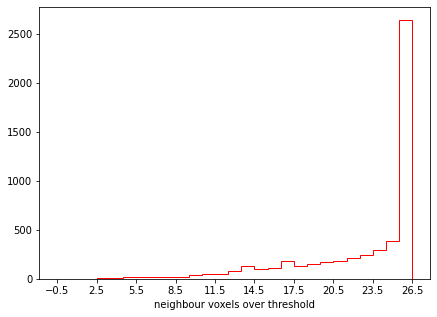

In [33]:
plt.figure(figsize=(7,5))
bb =np.arange(-.5, 27.5, 1)
plt.hist(stats_concrete_concrete.values(), bins = bb, edgecolor='red', histtype=u'step', density=False)
plt.xlabel('neighbour voxels over threshold')
plt.xticks(np.arange(-0.5,27.5,3))
plt.show()

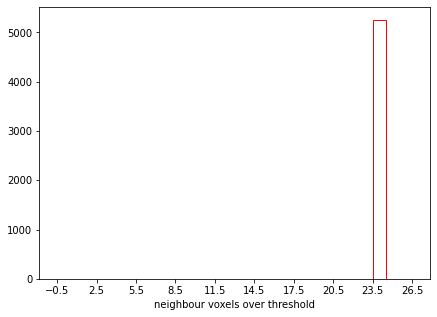

In [34]:
plt.figure(figsize=(7,5))
bb =np.arange(-.5, 27.5, 1)
plt.hist(stats_air_centre_concrete.values(), bins = bb, edgecolor='red', histtype=u'step', density=False)
plt.xlabel('neighbour voxels over threshold')
plt.xticks(np.arange(-0.5,27.5,3))
plt.show()

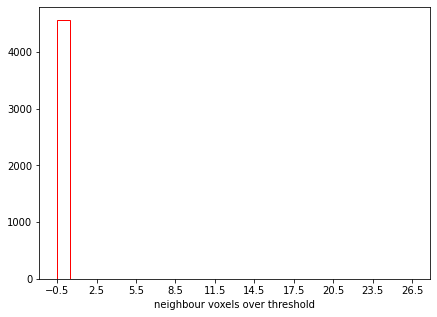

In [35]:
plt.figure(figsize=(7,5))
bb =np.arange(-.5, 27.5, 1)
plt.hist(stats_concrete_centre_air.values(), bins = bb, edgecolor='red', histtype=u'step', density=False)
plt.xlabel('neighbour voxels over threshold')
plt.xticks(np.arange(-0.5,27.5,3))
plt.show()

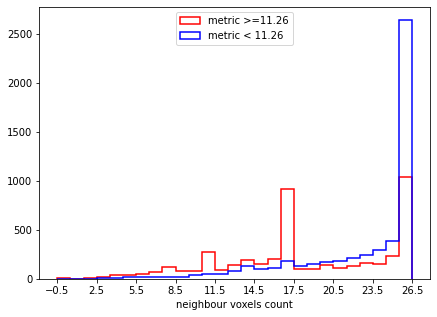

In [36]:
plt.figure(figsize=(7,5))
bb =np.arange(-0.5, 27.5, 1)
plt.hist(stats_air_air.values(), bins = bb, density=False, edgecolor='red', linewidth=1.5,histtype=u'step', label='metric >=11.26')
plt.hist(stats_concrete_concrete.values(), bins = bb, density=False, edgecolor='blue',linewidth=1.5, histtype=u'step', label='metric < 11.26')
plt.xlabel('neighbour voxels count')
plt.xticks(np.arange(-0.5,27.5,3))
plt.legend(loc='upper center')
#plt.yscale('log')
plt.show()

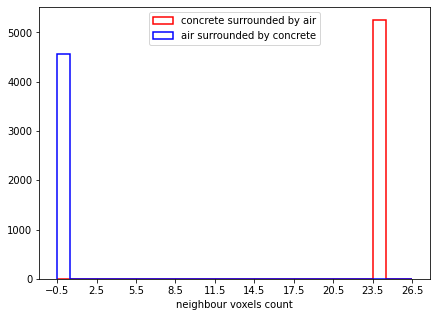

In [37]:
plt.figure(figsize=(7,5))
bb =np.arange(-0.5, 27.5, 1)
plt.hist(stats_air_centre_concrete.values(), bins = bb, density=False, edgecolor='red', linewidth=1.5,histtype=u'step', label='concrete surrounded by air')
plt.hist(stats_concrete_centre_air.values(), bins = bb, density=False, edgecolor='blue',linewidth=1.5, histtype=u'step', label='air surrounded by concrete')
plt.xlabel('neighbour voxels count')
plt.xticks(np.arange(-0.5,27.5,3))
plt.legend(loc='upper center')
#plt.yscale('log')
plt.show()

In [38]:
interesting = list(filter(lambda e: np.logical_and(stats_air_air[e] > 15, stats_air_air[e] < 20), stats_air_air))

In [39]:
interesting_out = list(filter(lambda e: np.logical_and(stats_concrete_concrete[e] <20, stats_concrete_concrete[e]>15), stats_concrete_concrete))

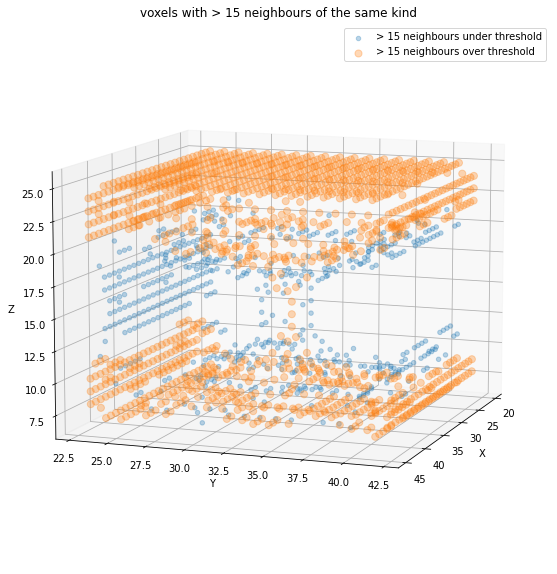

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
ax.set_title('voxels with > 15 neighbours of the same kind')
ax.scatter(np.array(interesting_out)[:,0],np.array(interesting_out)[:,1],np.array(interesting_out)[:,2], 
           s=20, alpha=.3, label='> 15 neighbours under threshold')
ax.scatter(np.array(interesting)[:,0],np.array(interesting)[:,1],np.array(interesting)[:,2], 
           s=50, alpha=.3, label='> 15 neighbours over threshold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
ax.view_init(elev=10, azim=20)
plt.draw()

In [74]:
from matplotlib import cm, colors

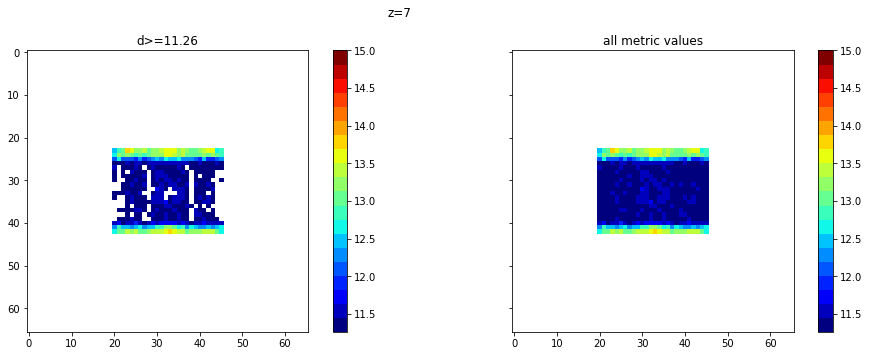

In [179]:

cmap = cm.get_cmap('jet', 20)
norm = colors.Normalize(vmin=11.265, vmax=15)
cmap.set_bad(color='white')

air_histogram = np.copy(histogram)
air_histogram[air_histogram<11.265]=0
masked_hist_air = np.ma.masked_where(air_histogram == 0, air_histogram)
masked_hist = np.ma.masked_where(histogram == 0, histogram)

for i in range(7, 26):#filtered_hist.shape[2]):
    fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize= (14,5))
    fig.suptitle('z={}'.format(i))
    im1 = ax[0].imshow(np.swapaxes(masked_array, 0,1)[:,:,i], cmap=cmap, norm=norm)
    im2 = ax[1].imshow(np.swapaxes(masked_hist,0,1)[:,:,i], cmap=cmap, norm=norm)
    
    ax[0].set_title('d>=11.26')
    ax[1].set_title('all metric values')
    
    #ax[0].set_xticks(np.linspace(0,66,10), minor=True)
    #ax[0].set_yticks(np.linspace(0,66,10), minor=True)
    
    #ax[0].set_xticklabels(np.ceil(np.linspace(-1000,1200,10)))
    #ax[0].set_yticklabels(np.ceil(np.linspace(-1000,1200,10)))
    
    fig.colorbar(im1, ax=ax[0], shrink=1)
    fig.colorbar(im2, ax=ax[1], shrink=1)
    plt.tight_layout()
    plt.show()
    break

In [241]:
hist2d = TH2F("hist","", 66, -1000,1000,66, -1000,1000)